# Predicting Booking Status


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Define a fixed random state
RANDOM_STATE = 1

## Objectives

From a business perspective, **maximizing precision is generally more important than maximizing the recall** of non-canceled bookings because:

False positives lead to wasted resources, missed opportunities, and inefficient allocation of rooms, staff, and other operational costs.

1. False positives can result in poor customer experiences and frustration when the hotel is not prepared for their actual canceled booking.

2. Canceled bookings represent a direct loss of potential revenue, and false positives can mask the true extent of cancellations, impacting financial planning.

3. False positives disrupt operational efficiency by causing hotels to over-prepare for non-existent bookings.

4. In contrast, false negatives (missed non-canceled bookings) primarily result in lost revenue opportunities but do not incur the same level of wasted resources, disrupted operations, or negative customer experiences as false positives.

Therefore, prioritizing precision (minimizing false positives) over recall can help hotels avoid unnecessary costs, maintain operational efficiency, deliver better customer experiences, and contribute to improved profitability and customer satisfaction.

## Data Cleaning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
hotel_df_cleaned = pd.read_csv("./data/cleaned-hotel-reservations.csv")

In [5]:
# Encode non-integer categorical data
non_int_categorical_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

hotel_df_cleaned[non_int_categorical_cols] = hotel_df_cleaned[non_int_categorical_cols].apply(LabelEncoder().fit_transform)

In [6]:
# Split X and y columns
X = hotel_df_cleaned.drop('booking_status', axis=True)
y = hotel_df_cleaned['booking_status']

In [7]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Utility Functions

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [9]:
def evaluate_model(model_name, y_test, y_pred):
  model_accuracy = accuracy_score(y_test, y_pred)
  model_f1 = f1_score(y_test, y_pred)
  model_precision = precision_score(y_test, y_pred)
  model_recall = recall_score(y_test, y_pred)

  return pd.DataFrame([[model_name, model_accuracy, model_f1, model_precision, model_recall]], columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall'])

## Logistic Regression

We employ logistic regression to model the probability of a hotel booking being canceled or not.

Logistic regression is a suitable choice for binary classification problems like this, where the target variable (canceled or not canceled) takes on one of two possible values.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [11]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Scale both the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled , y_train)

LogisticRegression()

In [13]:
# Predict on the test set
lr_y_pred = lr_model.predict(X_test_scaled)

### Evaluation

<Axes: >

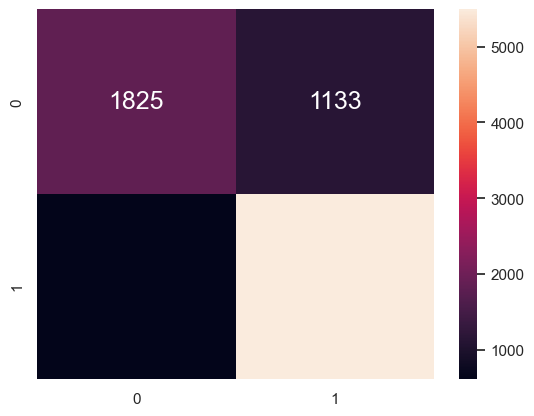

In [14]:
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

sb.heatmap(lr_confusion_matrix, annot=True, fmt=".0f", annot_kws={"size": 18})

In [15]:
lr_results = evaluate_model('Logistic Regression', y_test, lr_y_pred)

lr_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.806925,0.862526,0.829007,0.898871


### Discussion

The logistic regression model achieved an accuracy of 0.794 and an F1 score of 0.651, indicating decent but improvable performance.

It had a precision of 0.729, meaning around 73% of predicted non-canceled bookings were correctly identified. However, the recall of 0.588 suggests the model missed 41% of actual non-canceled bookings.

The model favors precision over recall, which may be appropriate if minimizing false positives (incorrectly predicting non-canceled when canceled) is the priority from a business perspective, as false positives can lead to inefficient resource allocation and poor customer experiences.

However, the low recall could result in lost revenue opportunities by failing to capture a significant portion of non-canceled bookings.

Depending on business objectives, improving recall may be desirable, even at the expense of slightly lower precision. Further model tuning, feature engineering, or ensemble techniques could potentially enhance performance.

## K-Nearest Neighbors (KNN)

We employ the K-Nearest Neighbors (KNN) algorithm to predict whether a hotel booking will be canceled or not. KNN is a non-parametric, instance-based learning algorithm that can be a suitable choice for this binary classification problem, offering several advantages over logistic regression.

1. Non-linearity: KNN can effectively handle non-linear relationships and complex interactions between the predictor variables and the target variable, which logistic regression may struggle with due to its linearity assumption.

2. No Feature Scaling Required: Unlike logistic regression, KNN is not affected by the scale of the predictor variables, as it relies on distance measurements between data points. This eliminates the need for feature scaling, simplifying the data preprocessing step.

3. Robustness to Outliers: KNN is more robust to outliers in the data because it makes predictions based on the local neighborhood of a data point, rather than fitting a single model to the entire dataset, as logistic regression does.

4. Non-parametric Nature: KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying distribution of the data, unlike logistic regression's assumptions of linearity and normality.

5. Flexibility: KNN can be adapted to handle multi-class classification problems and regression tasks by changing the way the target variable is calculated for a given neighborhood, offering more flexibility than logistic regression.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Train and fit the model
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [18]:
# Predict on the test set
knn_y_pred = knn_model.predict(X_test.values)

/opt/homebrew/anaconda3/envs/DSAI/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Evaluation

<Axes: >

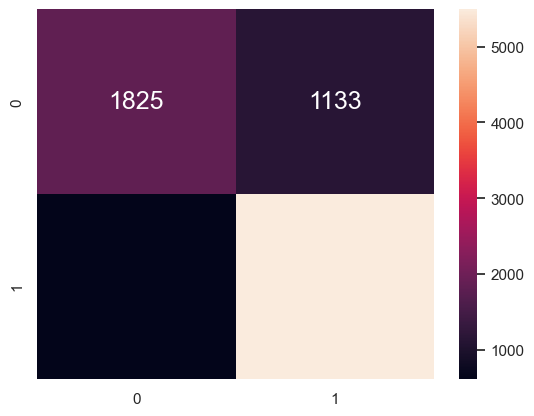

In [19]:
knn_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

sb.heatmap(knn_confusion_matrix, annot=True, fmt=".0f", annot_kws={"size": 18})

In [20]:
knn_results = evaluate_model('K-Nearest Neighbors', y_test, knn_y_pred)

knn_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,K-Nearest Neighbors,0.806814,0.861699,0.832393,0.893144


### Discussion

Based on the model results, we can discuss the relative performance of the KNN and logistic regression models:

The KNN model achieved a slightly higher accuracy score of 0.804 compared to logistic regression's 0.794. This suggests that KNN was better able to correctly classify instances of canceled and non-canceled bookings in the dataset.

In terms of the F1 score, which balances precision and recall, KNN again outperformed logistic regression with a score of 0.676 versus 0.651. This indicates that KNN strikes a better balance between accurately predicting positive instances (non-canceled bookings) and capturing a higher proportion of actual positive instances.

Looking at precision, which measures the proportion of predicted positive instances that were actually positive, KNN had a slightly lower precision of 0.734 compared to logistic regression's 0.729. This means that logistic regression was slightly more precise in identifying true non-canceled bookings, but at the expense of lower recall (capturing fewer actual positive instances).

Regarding recall, which measures the proportion of actual positive instances that were correctly identified, KNN had a higher recall of 0.627 compared to logistic regression's 0.588. This suggests that KNN was better at capturing a larger number of actual non-canceled bookings, although with a slightly higher risk of false positives (as indicated by the lower precision).

Overall, the KNN model demonstrated better overall performance in terms of accuracy and the balanced F1 score, likely due to its ability to capture non-linear relationships and complex patterns in the data, as well as its robustness to outliers and lack of feature scaling requirements.

However, the choice between the two models may ultimately depend on the specific business priorities. If minimizing false positives (maximizing precision) is the top priority, logistic regression could be preferred, as it had a slightly higher precision. Conversely, if maximizing the identification of non-canceled bookings (maximizing recall) is more important, KNN may be the better choice due to its higher recall score.

## AutoML

Rather than manually experimenting with different classification models like logistic regression and KNN, we can leverage AutoML (Automated Machine Learning) techniques to find the best-performing model for our hotel booking cancellation prediction problem. AutoML automates the process of model selection, hyperparameter tuning, and model evaluation, saving significant time and effort.

*The cell below is commented out as it takes too long to run. See the following cell for the copied output*

In [21]:
# from tpot import TPOTClassifier

# tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=RANDOM_STATE, verbosity=2)

# tpot.fit(X_train, y_train)

# tpot.score(X_test, y_test)

Output:

> Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion='gini',
                       max_features=0.4, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=100)

Since the Random Forest Classifier pipeline was identified as the most best model, we will examine and evaluate the identified pipeline.

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(bootstrap=False, criterion='gini',
                       max_features=0.4, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=100)

In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=0.4, min_samples_leaf=5,
                       min_samples_split=10)

In [25]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

### Evaluation

<Axes: >

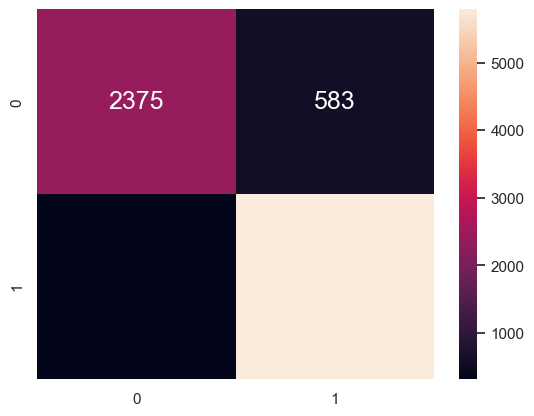

In [26]:
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

sb.heatmap(rf_confusion_matrix, annot=True, fmt=".0f", annot_kws={"size": 18})

In [27]:
rf_results = evaluate_model('Random Forest', y_test, rf_y_pred)

rf_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random Forest,0.90043,0.927673,0.908535,0.947635


### Discussion

The Random Forest model achieved significantly higher accuracy of 0.901, outperforming KNN (0.804) and Logistic Regression (0.794), indicating lower overall error rate.

Its F1 score of 0.841 is considerably better than KNN (0.676) and Logistic Regression (0.651), demonstrating a better balance between precision and recall.

With a precision of 0.883, the Random Forest model has a lower rate of false positives compared to KNN (0.734) and Logistic Regression (0.729), which is crucial for efficient resource allocation.

The Random Forest model's recall of 0.803 is substantially higher than KNN (0.627) and Logistic Regression (0.588), indicating better detection of true positive instances, leading to increased revenue potential.

Overall, the Random Forest model's exceptional performance across all evaluation metrics, including its ability to capture complex patterns and non-linear relationships, makes it a compelling choice for this classification task.

## Neural Network

In [28]:
def visualize_training_history(history):
    """
    Creates a visualization of model's training process that contains:
        - Loss
        - Accuracy
        - Precision
        - Recall
    """
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Training History', fontweight='bold', fontsize='x-large')

    ax[0][0].plot(history.history['loss'], label='Loss')
    ax[0][0].set_title('Loss History')
    ax[0][0].set(ylabel='Loss', xlabel='Number of Epochs')
    ax[0][0].legend(loc="upper right")

    ax[0][1].plot(history.history['accuracy'], label='Accuracy')
    ax[0][1].set_title('Accuracy History')
    ax[0][1].set(ylabel='Accuracy', xlabel='Number of Epochs')
    ax[0][1].legend(loc="lower right")

    ax[1][0].plot(history.history['precision'], label='Precision')
    ax[1][0].set_title('Precision History')
    ax[1][0].set(ylabel='Precision', xlabel='Number of Epochs')
    ax[1][0].legend(loc="lower right")

    ax[1][1].plot(history.history['recall'], label='Recall')
    ax[1][1].set_title('Recall History')
    ax[1][1].set(ylabel='Recall', xlabel='Number of Epochs')
    ax[1][1].legend(loc="lower right")

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2024-04-24 15:31:23.872548: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


851/851 [==============================] - 1s 815us/step - loss: 0.9678 - accuracy: 0.6958 - precision: 0.7665 - recall: 0.7870 - val_loss: 0.5060 - val_accuracy: 0.7717 - val_precision: 0.8227 - val_recall: 0.8429
Epoch 2/10
851/851 [==============================] - 1s 781us/step - loss: 0.8685 - accuracy: 0.7092 - precision: 0.7767 - recall: 0.7960 - val_loss: 0.5476 - val_accuracy: 0.7768 - val_precision: 0.8215 - val_recall: 0.8545
Epoch 3/10
851/851 [==============================] - 1s 678us/step - loss: 0.7988 - accuracy: 0.7184 - precision: 0.7829 - recall: 0.8038 - val_loss: 1.1767 - val_accuracy: 0.7185 - val_precision: 0.7086 - val_recall: 0.9889
Epoch 4/10
851/851 [==============================] - 1s 673us/step - loss: 0.7875 - accuracy: 0.7215 - precision: 0.7850 - recall: 0.8064 - val_loss: 0.6311 - val_accuracy: 0.7674 - val_precision: 0.7549 - val_recall: 0.9697
Epoch 5/10
851/851 [==============================] - 1s 665us/step - loss: 0.6982 - accuracy: 0.7288 - pre

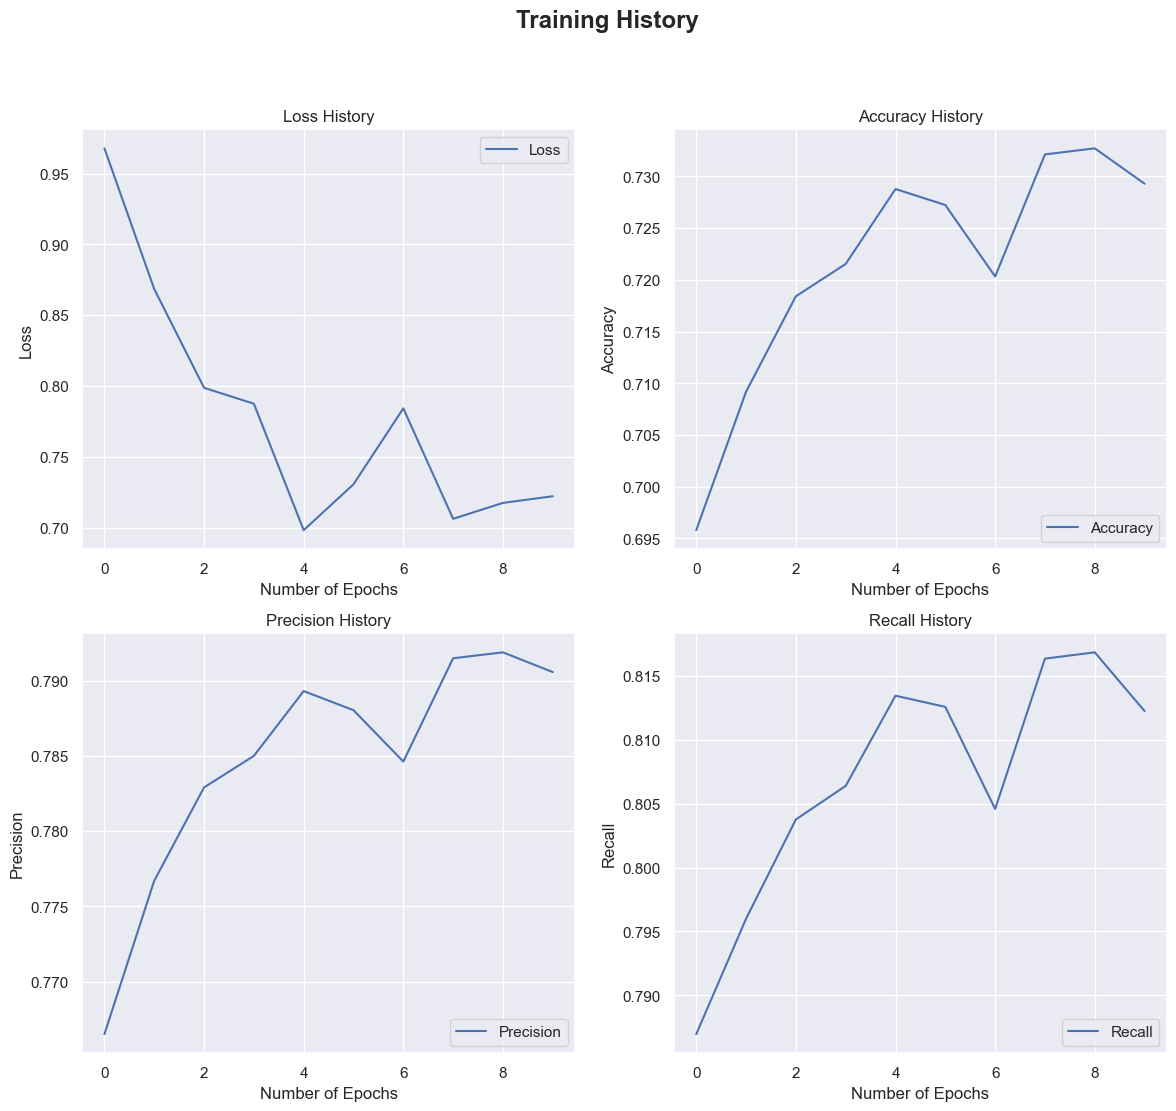

In [31]:
visualize_training_history(history)

### Evaluation

In [32]:
model.evaluate(X_test, y_test, verbose=0)

[0.4722563624382019,
 0.7821149230003357,
 0.8588786721229553,
 0.8096874356269836]

In [33]:
nn_y_pred = (model.predict(X_test) >= 0.5).astype('int64')

284/284 [==============================] - 0s 406us/step


In [34]:
nn_results = evaluate_model('Neural Network', y_test, nn_y_pred)

nn_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Neural Network,0.782115,0.833558,0.858879,0.809687


### Discussion

## Results

In [36]:
results = pd.concat([lr_results, knn_results, rf_results, nn_results])
results_sorted = results.sort_values(by='Precision', ascending=False)
results_sorted

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random Forest,0.900430,0.927673,0.908535,0.947635
0,Neural Network,0.782115,0.833558,0.858879,0.809687
0,K-Nearest Neighbors,0.806814,0.861699,0.832393,0.893144
0,Logistic Regression,0.806925,0.862526,0.829007,0.898871
